In [57]:
import pandas as pd

In [58]:
df_cathodic_n1 = pd.read_csv('dataset/copy_of_original_data/copy_cathodic_N1.csv')
df_cathodic_n2 = pd.read_csv('dataset/copy_of_original_data/copy_cathodic_N2.csv')
df_cathodic_n3 = pd.read_csv('dataset/copy_of_original_data/copy_cathodic_N3.csv')

/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_5693/1540722125.py:1: DtypeWarning: Columns (0,1,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cathodic_n1 = pd.read_csv('dataset/copy_of_original_data/copy_cathodic_N1.csv')
/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_5693/1540722125.py:2: DtypeWarning: Columns (0,1,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cathodic_n2 = pd.read_csv('dataset/copy_of_original_data/copy_cathodic_N2.csv')
/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_5693/1540722125.py:3: DtypeWarning: Columns (0,1,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cathodic_n3 = pd.read_csv('dataset/copy_of_original_data/copy_cathodic_N3.csv')


In [59]:
df_cathodic_n1.columns

Index(['Input A (Acoustic Emission Data)', 'Unnamed: 1', 'Unnamed: 2',
       'Input B (Electrochemical Data)', 'Unnamed: 4', 'Unnamed: 5',
       'Input C (Mechanical Data)', 'Unnamed: 7', 'Unnamed: 8',
       'Output D (Cathodic Condition) ?'],
      dtype='object')

In [60]:
df_cathodic_n2.columns

Index(['Input A (Acoustic Emission Data)', 'Unnamed: 1', 'Unnamed: 2',
       'Input B (Electrochemical Data)', 'Unnamed: 4', 'Unnamed: 5',
       'Input C (Mechanical Data)', 'Unnamed: 7', 'Unnamed: 8',
       'Output D (Cathodic Condition) ?'],
      dtype='object')

In [61]:
df_cathodic_n3.columns

Index(['Input A (Acoustic Emission Data)', 'Unnamed: 1', 'Unnamed: 2',
       'Input B (Electrochemical Data)', 'Unnamed: 4', 'Unnamed: 5',
       'Input C (Mechanical Data)', 'Unnamed: 7', 'Unnamed: 8',
       'Output D (Cathodic Condition) ?'],
      dtype='object')

In [62]:
df_cathodic_n1.drop(columns=['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 8'], axis=1, inplace=True)
df_cathodic_n1 = df_cathodic_n1.rename(columns={
    'Input A (Acoustic Emission Data)' : 'time1',
    'Input B (Electrochemical Data)' : 'time2',
    'Input C (Mechanical Data)' : 'time3',
    'Unnamed: 1' : 'accoustic_emmision_data',
    'Unnamed: 4' : 'electrochemical_data',
    'Unnamed: 7' : 'mechanical_data',
    'Output D (Cathodic Condition) ?':'output'
})
df_cathodic_n1.columns

Index(['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data', 'output'],
      dtype='object')

In [63]:
df_cathodic_n2.drop(columns=['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 8'], axis=1, inplace=True)
df_cathodic_n2 = df_cathodic_n2.rename(columns={
    'Input A (Acoustic Emission Data)' : 'time1',
    'Input B (Electrochemical Data)' : 'time2',
    'Input C (Mechanical Data)' : 'time3',
    'Unnamed: 1' : 'accoustic_emmision_data',
    'Unnamed: 4' : 'electrochemical_data',
    'Unnamed: 7' : 'mechanical_data',
    'Output D (Cathodic Condition) ?':'output'
})
df_cathodic_n2.columns

Index(['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data', 'output'],
      dtype='object')

In [64]:
df_cathodic_n3.drop(columns=['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 8'], axis=1, inplace=True)
df_cathodic_n3 = df_cathodic_n3.rename(columns={
    'Input A (Acoustic Emission Data)' : 'time1',
    'Input B (Electrochemical Data)' : 'time2',
    'Input C (Mechanical Data)' : 'time3',
    'Unnamed: 1' : 'accoustic_emmision_data',
    'Unnamed: 4' : 'electrochemical_data',
    'Unnamed: 7' : 'mechanical_data',
    'Output D (Cathodic Condition) ?':'output'
})
df_cathodic_n3.columns

Index(['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data', 'output'],
      dtype='object')

In [65]:
df_cathodic_n1.output = 'cathodic'
df_cathodic_n2.output = 'cathodic'
df_cathodic_n3.output = 'cathodic'

### Cathodic set N1 data cleaning

In [66]:
df_temp = df_cathodic_n1[~df_cathodic_n1['accoustic_emmision_data'].isnull()]
df_temp = df_temp[df_temp['electrochemical_data'].notnull()]
df_temp = df_temp[df_temp['mechanical_data'].notnull()]
df_temp = df_temp.iloc[2:].reset_index(drop=True)
df_temp.isnull().sum(), df_temp.shape

(time1                      0
 accoustic_emmision_data    0
 time2                      0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 output                     0
 dtype: int64,
 (247651, 7))

In [67]:
cols = ['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data']
for col in cols:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
df_temp.shape

(247651, 7)

In [68]:
df_temp = df_temp[df_temp['accoustic_emmision_data'].notnull()]
df_temp.isnull().sum()

time1                      0
accoustic_emmision_data    0
time2                      0
electrochemical_data       0
time3                      0
mechanical_data            0
output                     0
dtype: int64

In [69]:
time_cols = ['time1','time2','time3']
for col in time_cols:
    df_temp[col] = round(df_temp[col], 2)

In [70]:
df_time1 = df_temp[['time1', 'accoustic_emmision_data']]
df_time2 = df_temp[['time2', 'electrochemical_data']]
df_time3 = df_temp[['time3', 'mechanical_data']]

In [71]:
df_time3.sort_values(by='time3')

,time3,mechanical_data
0,0.06,0.040518
1,0.07,0.040518
2,0.09,0.040482
3,0.10,0.040482
4,0.12,0.040482
...,...,...
247646,3684.91,0.177410
247647,3684.93,0.177410
247648,3684.94,0.177410
247649,3684.96,0.177410


In [72]:
df_time_temp = df_time1.merge(df_time2, left_on='time1', right_on='time2')
df_time_temp.shape

(202903, 4)

In [73]:
df_time_temp = df_time_temp[['time1', 'accoustic_emmision_data', 'electrochemical_data']]
df_time_temp_1 = df_time_temp.merge(df_time3, left_on='time1', right_on='time3')
df_time_temp_1.shape, df_time_temp_1.isnull().sum()

((136749, 5),
 time1                      0
 accoustic_emmision_data    0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 dtype: int64)

In [74]:
df_time_temp_1.head(10)

,time1,accoustic_emmision_data,electrochemical_data,time3,mechanical_data
0,0.06,80700.0,-0.000007,0.06,0.040518
1,0.07,68300.0,-0.000007,0.07,0.040518
2,0.09,58400.0,-0.000007,0.09,0.040482
3,0.10,56900.0,-0.000007,0.10,0.040482
4,0.12,56200.0,-0.000007,0.12,0.040482
5,0.13,56500.0,-0.000007,0.13,0.040482
6,0.14,57200.0,-0.000007,0.14,0.040458
7,0.16,63500.0,-0.000006,0.16,0.040458
8,0.18,89400.0,-0.000006,0.18,0.040458
9,0.19,119000.0,-0.000006,0.19,0.040458


In [75]:
cleaned_n1 = df_time_temp_1.copy()
cleaned_n1 = cleaned_n1[['time1', 'accoustic_emmision_data', 'electrochemical_data', 'mechanical_data']]
cleaned_n1.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.06,80700.0,-0.000007,0.040518
1,0.07,68300.0,-0.000007,0.040518
2,0.09,58400.0,-0.000007,0.040482
3,0.10,56900.0,-0.000007,0.040482
4,0.12,56200.0,-0.000007,0.040482


In [102]:
cleaned_n1['output'] = 'cathodic'
cleaned_n1.to_csv('dataset/n1_n2_n3_cleaned/cathodic_N1.csv', index=False)

In [103]:
cleaned_n1.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data,output
0,0.06,80700.0,-0.000007,0.040518,cathodic
1,0.07,68300.0,-0.000007,0.040518,cathodic
2,0.09,58400.0,-0.000007,0.040482,cathodic
3,0.10,56900.0,-0.000007,0.040482,cathodic
4,0.12,56200.0,-0.000007,0.040482,cathodic


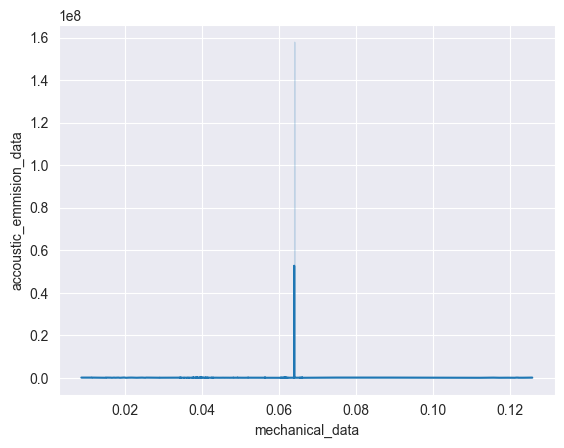

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(cleaned_n1, y='accoustic_emmision_data', x='mechanical_data')
plt.show()

### Cathodic set N2 data cleaning

In [77]:
df_temp = df_cathodic_n2[~df_cathodic_n2['accoustic_emmision_data'].isnull()]
df_temp = df_temp[df_temp['electrochemical_data'].notnull()]
df_temp = df_temp[df_temp['mechanical_data'].notnull()]
df_temp = df_temp.iloc[2:].reset_index(drop=True)
df_temp.isnull().sum(), df_temp.shape

(time1                      0
 accoustic_emmision_data    0
 time2                      0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 output                     0
 dtype: int64,
 (295322, 7))

In [78]:
cols = ['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data']
for col in cols:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
df_temp.shape

(295322, 7)

In [79]:
df_temp = df_temp[df_temp['accoustic_emmision_data'].notnull()]
df_temp.isnull().sum()

time1                      0
accoustic_emmision_data    0
time2                      0
electrochemical_data       0
time3                      0
mechanical_data            0
output                     0
dtype: int64

In [80]:
time_cols = ['time1','time2','time3']
for col in time_cols:
    df_temp[col] = round(df_temp[col], 2)

In [81]:
df_time1 = df_temp[['time1', 'accoustic_emmision_data']]
df_time2 = df_temp[['time2', 'electrochemical_data']]
df_time3 = df_temp[['time3', 'mechanical_data']]

In [82]:
df_time3.sort_values(by='time3')

,time3,mechanical_data
0,0.05,0.035542
1,0.07,0.035542
2,0.08,0.035747
3,0.09,0.035747
4,0.11,0.035747
...,...,...
295317,4406.04,0.018060
295318,4406.06,0.018060
295319,4406.07,0.018060
295320,4406.09,0.018060


In [83]:
df_time_temp = df_time1.merge(df_time2, left_on='time1', right_on='time2')
df_time_temp.shape

(262552, 4)

In [84]:
df_time_temp = df_time_temp[['time1', 'accoustic_emmision_data', 'electrochemical_data']]
df_time_temp_1 = df_time_temp.merge(df_time3, left_on='time1', right_on='time3')
df_time_temp_1.shape, df_time_temp_1.isnull().sum()

((176792, 5),
 time1                      0
 accoustic_emmision_data    0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 dtype: int64)

In [85]:
cleaned_n2 = df_time_temp_1.copy()
cleaned_n2 = cleaned_n2[['time1', 'accoustic_emmision_data', 'electrochemical_data', 'mechanical_data']]
cleaned_n2.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.05,37100.0,-0.000006,0.035542
1,0.07,32400.0,-0.000006,0.035542
2,0.08,34100.0,-0.000006,0.035747
3,0.09,40500.0,-0.000006,0.035747
4,0.11,14300.0,-0.000006,0.035747


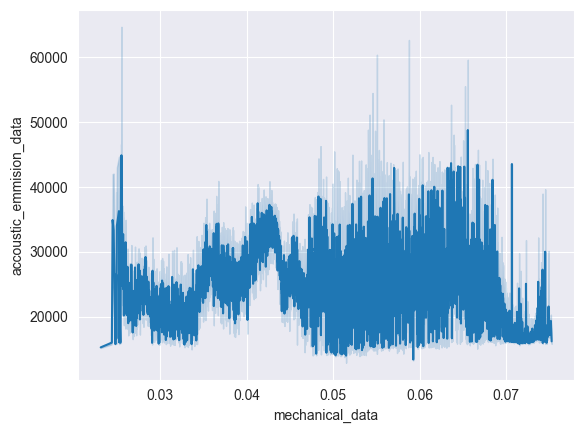

In [86]:
sns.lineplot(cleaned_n2, y='accoustic_emmision_data', x='mechanical_data')
plt.show()

In [104]:
cleaned_n2['output'] = 'cathodic'
cleaned_n2.to_csv('dataset/n1_n2_n3_cleaned/cathodic_N2.csv', index=False)
cleaned_n2.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data,output
0,0.05,37100.0,-0.000006,0.035542,cathodic
1,0.07,32400.0,-0.000006,0.035542,cathodic
2,0.08,34100.0,-0.000006,0.035747,cathodic
3,0.09,40500.0,-0.000006,0.035747,cathodic
4,0.11,14300.0,-0.000006,0.035747,cathodic


### Cathodic set N3 data cleaning

In [87]:
df_temp = df_cathodic_n3[~df_cathodic_n3['accoustic_emmision_data'].isnull()]
df_temp = df_temp[df_temp['electrochemical_data'].notnull()]
df_temp = df_temp[df_temp['mechanical_data'].notnull()]
df_temp = df_temp.iloc[2:].reset_index(drop=True)
df_temp.isnull().sum(), df_temp.shape

(time1                      0
 accoustic_emmision_data    0
 time2                      0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 output                     0
 dtype: int64,
 (243600, 7))

In [88]:
cols = ['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data']
for col in cols:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
df_temp.shape

(243600, 7)

In [89]:
df_temp = df_temp[df_temp['accoustic_emmision_data'].notnull()]
df_temp.isnull().sum()

time1                      0
accoustic_emmision_data    0
time2                      0
electrochemical_data       0
time3                      0
mechanical_data            0
output                     0
dtype: int64

In [90]:
time_cols = ['time1','time2','time3']
for col in time_cols:
    df_temp[col] = round(df_temp[col], 2)

In [91]:
df_time1 = df_temp[['time1', 'accoustic_emmision_data']]
df_time2 = df_temp[['time2', 'electrochemical_data']]
df_time3 = df_temp[['time3', 'mechanical_data']]
df_time3 = df_time3[349:]

In [92]:
df_time3[df_time3.time3 == 0.05]

,time3,mechanical_data
349,0.05,0.05153


In [93]:
df_time3[df_time3.time3 == 0.08]

,time3,mechanical_data
351,0.08,0.05153


In [94]:
df_time3.iloc[348]

time3              5.20000
mechanical_data    0.04647
Name: 697, dtype: float64

In [95]:
df_time_temp = df_time1.merge(df_time2, left_on='time1', right_on='time2')
df_time_temp.shape

(240013, 4)

In [96]:
df_time_temp = df_time_temp[['time1', 'accoustic_emmision_data', 'electrochemical_data']]
df_time_temp_1 = df_time_temp.merge(df_time3, left_on='time1', right_on='time3')
df_time_temp_1.shape, df_time_temp_1.isnull().sum()

((161877, 5),
 time1                      0
 accoustic_emmision_data    0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 dtype: int64)

In [97]:
cleaned_n3 = df_time_temp_1.copy()
cleaned_n3 = cleaned_n3[['time1', 'accoustic_emmision_data', 'electrochemical_data', 'mechanical_data']]
cleaned_n3.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.05,62600,-0.00001,0.051530
1,0.07,62498,-0.00001,0.051530
2,0.08,62537,-0.00001,0.051530
3,0.10,62482,-0.00001,0.051530
4,0.11,62491,-0.00001,0.051723


In [105]:
cleaned_n3['output'] = 'cathodic'
cleaned_n3.to_csv('dataset/n1_n2_n3_cleaned/cathodic_N3.csv', index=False)
cleaned_n3.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data,output
0,0.05,62600,-0.00001,0.051530,cathodic
1,0.07,62498,-0.00001,0.051530,cathodic
2,0.08,62537,-0.00001,0.051530,cathodic
3,0.10,62482,-0.00001,0.051530,cathodic
4,0.11,62491,-0.00001,0.051723,cathodic


### Concatinating cathodic N1, N2 and, N3

In [98]:
df_cathodic_concat = pd.concat([cleaned_n1, cleaned_n2, cleaned_n3])
df_cathodic_concat.isnull().sum(), df_cathodic_concat.shape

(time1                      0
 accoustic_emmision_data    0
 electrochemical_data       0
 mechanical_data            0
 dtype: int64,
 (475418, 4))

In [100]:
df_cathodic_concat['output'] = 'cathodic'

In [101]:
df_cathodic_concat.to_csv('dataset/cathodic_concat.csv', index=False)

In [1]:
import pandas as pd

df = pd.read_csv('dataset/cathodic_concat.csv')

In [50]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [49]:
cleaned_n1.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.06,80700.0,-0.000007,0.040518
1,0.07,68300.0,-0.000007,0.040518
2,0.09,58400.0,-0.000007,0.040482
3,0.10,56900.0,-0.000007,0.040482
4,0.12,56200.0,-0.000007,0.040482


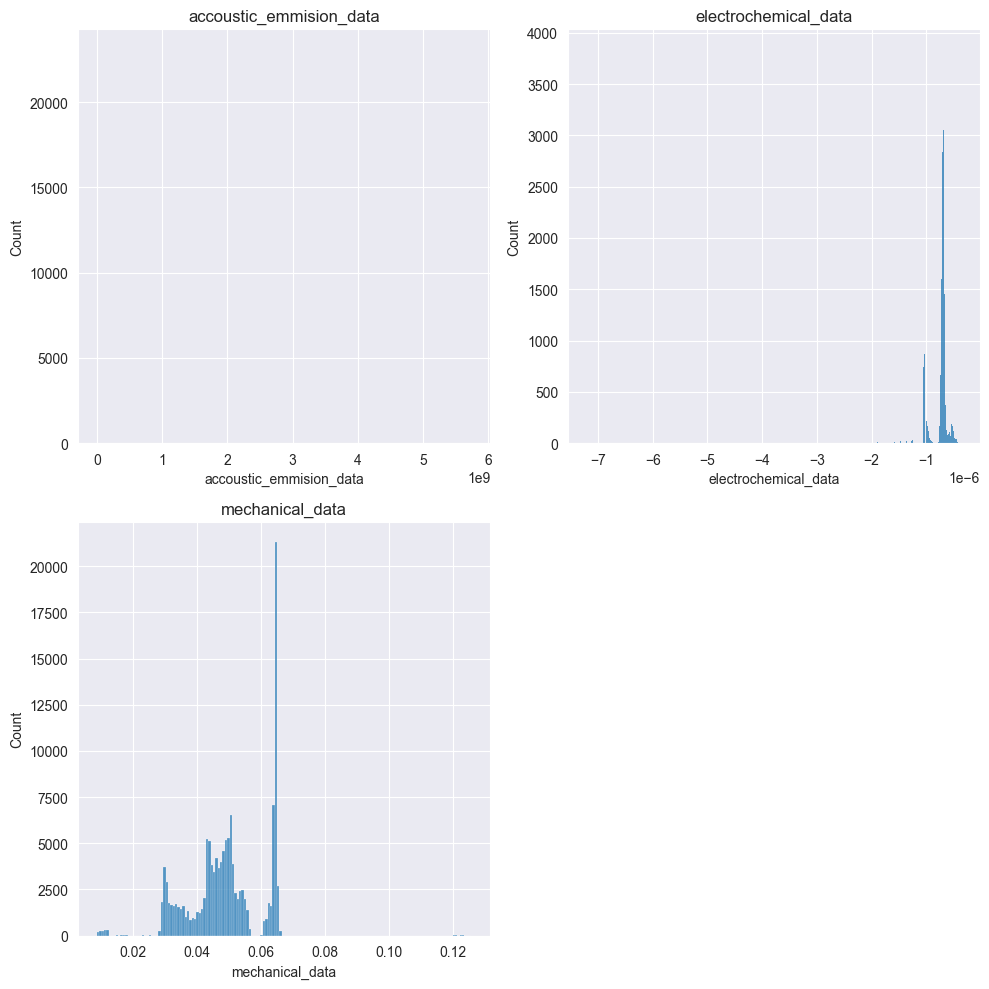

In [48]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(cleaned_n1[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

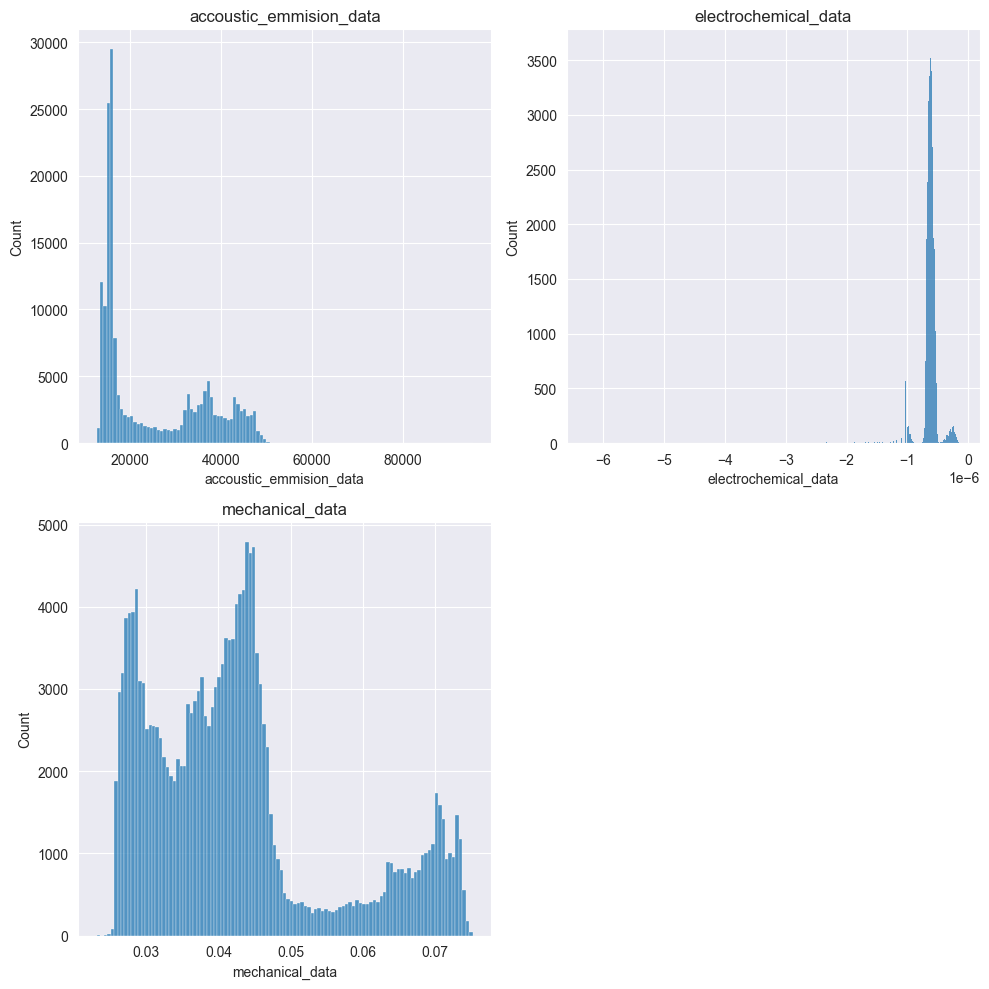

In [47]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(cleaned_n2[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

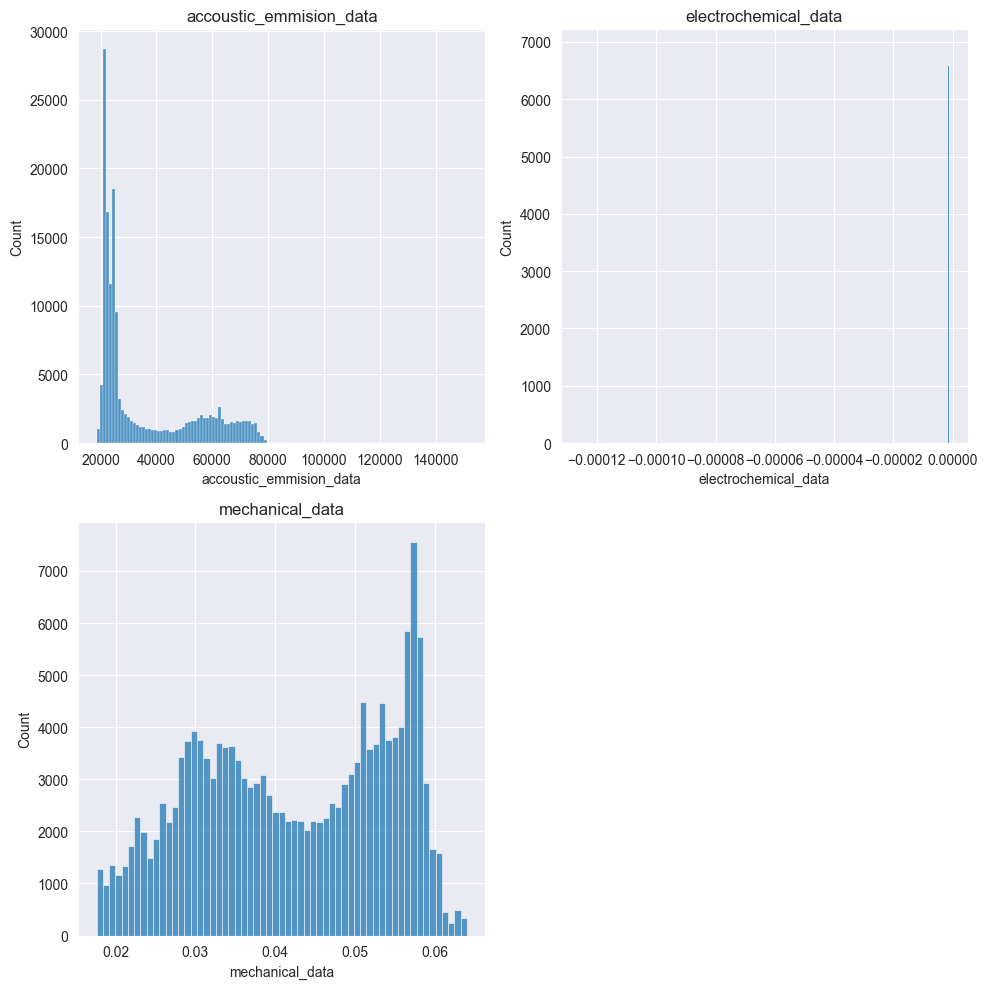

In [46]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(cleaned_n3[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()